In [1]:
import numpy as np
import matplotlib.pyplot as plt

G0 = 6.67430 * np.power(10., -11.)
h_lejos = 0.674 # valor de h hoy determinado a partir del universo lejano 0.674+/-0.005
h_cerca = 0.738 # valor de h hoy determinado a partir del universo cercano 0.738+0.007
H0_cerca = (h_cerca * 100 * np.power(10., 3.)) / (3.09 * np.power(10., 16.) * np.power(10., 6.)) # Constante de Hubble medido en universo cercano
c = 2.99792458 * np.power(10., 5.) * np.power(10., 3.)
Omega_r0 = (4.152 * np.power(10., -5.)) / np.power(h_cerca, 2.)
Omega_m0 = 0.143 / np.power(h_cerca, 2.)
Omega_L0 = 1 - Omega_m0 - Omega_r0
L_clas = (3 * Omega_L0 * np.power(H0_cerca, 2.))/np.power(c, 2.)

P = 1000000 # Número de pasos
tHi = 0. # tiempo inicial multiplicado por H0
tHf = 1. # tiempo final multiplicado por H0
Delta_tH_ini = (tHf - tHi) / P # Largo del paso inicial
a1 = np.zeros(P, dtype=np.float64)
Delta_a = np.zeros(P, dtype=np.float64)
tH = np.zeros(P, dtype=np.float64)
Delta_tH = np.zeros(P, dtype=np.float64)

a1[0] = 1.
tH[0] = 1.
Delta_tH[0] = Delta_tH_ini

for i in range(P-1):
    Delta_a[i] = np.sqrt((Omega_r0/np.power(a1[i], 2.)) + (Omega_m0/a1[i]) + (Omega_L0*np.power(a1[i], 2.))) * Delta_tH[i]
    tH[i+1] = tH[i] - Delta_tH[i]
    a1[i+1] = a1[i] - Delta_a[i]
    Delta_tH[i+1] = (Delta_a[0]/Delta_tH[0]) * (Delta_tH[i]/Delta_a[i]) * Delta_tH[0]

P_ini = P - 9
t = np.zeros(P_ini, dtype=np.float64)
a = np.zeros(P_ini, dtype=np.float64)
z = np.zeros(P_ini, dtype=np.float64)
Delta_t = np.zeros(P, dtype=np.float64)

for i in range(P_ini):
    t[i] = (tH[P_ini-i]/H0_cerca) - (tH[P_ini]/H0_cerca)
    a[i] = a1[P_ini-i]
    z[i] = (1./a[i]) - 1.

for i in range(P):
    Delta_t[i] = Delta_tH[P-1-i]/H0_cerca #se transforman los Delta_tH a Delta_t y se ordenan

t0 = t[P_ini-1] # Edad del universo cosmología LCDM
Pm = P_ini - 1
Da = np.zeros(Pm, dtype=np.float64)
H = np.zeros(Pm, dtype=np.float64)

for i in range(Pm):
    Da[i] = (a[i+1]-a[i])/(t[i+1]-t[i])
    H[i] = Da[i]/a[i]

rho_r0 = (3*Omega_r0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0)

In [2]:
iteraciones = 11 # numero de iteraciones en cada parámetro libre
NDGP = np.zeros(iteraciones, dtype=np.float64) # valores de derivada de G hoy
rho_L0P = np.zeros(iteraciones, dtype=np.float64) # valores de densidad de energía oscura hoy
rho_m0P = np.zeros(iteraciones, dtype=np.float64) # valores de densidad de materia hoy
EP = np.zeros((iteraciones, iteraciones), dtype=np.float64) # error porcentual para cada punto en el espacio parámetros

In [3]:
for i in range(len(NDGP)):
    if i==0:
        NDGP[i] = -0.010
    if i==1:
        NDGP[i] = -0.008
    if i==2:
        NDGP[i] = -0.006
    if i==3:
        NDGP[i] = -0.004
    if i==4:
        NDGP[i] = -0.002
    if i==5:
        NDGP[i] = 0
    if i==6:
        NDGP[i] = 0.002
    if i==7:
        NDGP[i] = 0.004
    if i==8:
        NDGP[i] = 0.006
    if i==9:
        NDGP[i] = 0.008
    if i==10:
        NDGP[i] = 0.010

for j in range(len(rho_L0P)):
    if j==0:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 0.990
    if j==1:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 0.992
    if j==2:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 0.994
    if j==3:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 0.996
    if j==4:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 0.998
    if j==5:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.000
    if j==6:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.002
    if j==7:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.004
    if j==8:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.006
    if j==9:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.008
    if j==10:
        rho_L0P[j] = (3*Omega_L0*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0) * 1.010
    rho_m0P[j] = ((3*np.power(H0_cerca, 2.)*np.power(c, 2.))/(8*np.pi*G0)) - rho_L0P[j] - rho_r0

In [4]:
indice_NDG = 0
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.1892323965535
Error porcentual de h_CMB: 11.101737277558861


In [5]:
indice_NDG = 1
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.8773403189125
Error porcentual de h_CMB: 10.84930979138164


In [6]:
indice_NDG = 2
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.4709033938293
Error porcentual de h_CMB: 10.907145840031522


In [7]:
indice_NDG = 3
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.0592297337369
Error porcentual de h_CMB: 11.289774158239313


In [8]:
indice_NDG = 4
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.8499787792302
Error porcentual de h_CMB: 11.217192252196837


In [9]:
indice_NDG = 5
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.2047105134575
Error porcentual de h_CMB: 10.74881287894309


In [10]:
indice_NDG = 6
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.608233815056
Error porcentual de h_CMB: 10.613992724322149


In [11]:
indice_NDG = 7
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.381818612354
Error porcentual de h_CMB: 10.864180370704231


In [12]:
indice_NDG = 8
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.0054884853846
Error porcentual de h_CMB: 10.765398184743933


In [13]:
indice_NDG = 9
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.9947821602418
Error porcentual de h_CMB: 11.050951116371792


In [14]:
indice_NDG = 10
indice_rhoL0 = 0

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.8565283566566
Error porcentual de h_CMB: 10.991093026500671


In [15]:
indice_NDG = 0
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.7776410613776
Error porcentual de h_CMB: 11.129489652363679


In [16]:
indice_NDG = 1
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.3652138278796
Error porcentual de h_CMB: 11.023276959615256


In [17]:
indice_NDG = 2
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.4448326785964
Error porcentual de h_CMB: 11.159898553168345


In [18]:
indice_NDG = 3
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.7664211820932
Error porcentual de h_CMB: 10.848314900601128


In [19]:
indice_NDG = 4
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.7921730633423
Error porcentual de h_CMB: 10.81396513112348


In [20]:
indice_NDG = 5
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.4987869457873
Error porcentual de h_CMB: 10.403627912246876


In [21]:
indice_NDG = 6
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.476891542995
Error porcentual de h_CMB: 11.010937131161697


In [22]:
indice_NDG = 7
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.6872991526857
Error porcentual de h_CMB: 10.520321445863544


In [23]:
indice_NDG = 8
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0105490683184
Error porcentual de h_CMB: 10.372960897897412


In [24]:
indice_NDG = 9
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.557319260431
Error porcentual de h_CMB: 10.585986439711544


In [32]:
indice_NDG = 10
indice_rhoL0 = 1

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.0256534688183
Error porcentual de h_CMB: 10.462459170539049


In [33]:
indice_NDG = 0
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.045457723095
Error porcentual de h_CMB: 10.941464707469311


In [34]:
indice_NDG = 1
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.2030280620397
Error porcentual de h_CMB: 10.927815313900386


In [35]:
indice_NDG = 2
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.116221457638
Error porcentual de h_CMB: 10.388082639710422


In [36]:
indice_NDG = 3
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.0326751509197
Error porcentual de h_CMB: 10.173928207606671


In [37]:
indice_NDG = 4
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.2445281855912
Error porcentual de h_CMB: 10.16975810319718


In [38]:
indice_NDG = 5
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.6073848141582
Error porcentual de h_CMB: 10.513993923662413


In [39]:
indice_NDG = 6
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.134461468869
Error porcentual de h_CMB: 10.399169323831963


In [40]:
indice_NDG = 7
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.7493085804351
Error porcentual de h_CMB: 10.622603803545692


In [41]:
indice_NDG = 8
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.7367022114408
Error porcentual de h_CMB: 10.420723387915448


In [42]:
indice_NDG = 9
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.0057570880492
Error porcentual de h_CMB: 10.5883978721002


In [43]:
indice_NDG = 10
indice_rhoL0 = 2

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.8663500154619
Error porcentual de h_CMB: 10.366456505521706


In [44]:
indice_NDG = 0
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.2024602602005
Error porcentual de h_CMB: 10.086890562552712


In [45]:
indice_NDG = 1
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.8870788019606
Error porcentual de h_CMB: 10.158548740168717


In [46]:
indice_NDG = 2
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.0803507389476
Error porcentual de h_CMB: 10.474555914547556


In [47]:
indice_NDG = 3
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.0106129700982
Error porcentual de h_CMB: 10.262530861353348


In [48]:
indice_NDG = 4
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.6318648798606
Error porcentual de h_CMB: 10.32435617525308


In [4]:
indice_NDG = 5
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.4376582485004
Error porcentual de h_CMB: 9.931228786104793


In [5]:
indice_NDG = 6
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.0919341650929
Error porcentual de h_CMB: 9.837213287913876


In [6]:
indice_NDG = 7
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.4614909686547
Error porcentual de h_CMB: 10.020273300621295


In [7]:
indice_NDG = 8
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.0966660199178
Error porcentual de h_CMB: 9.76214417416865


In [8]:
indice_NDG = 9
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0494428438185
Error porcentual de h_CMB: 9.878156500884172


In [9]:
indice_NDG = 10
indice_rhoL0 = 3

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.0365274045769
Error porcentual de h_CMB: 10.322774590656595


In [10]:
indice_NDG = 0
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.7792153090757
Error porcentual de h_CMB: 10.433677916430293


In [11]:
indice_NDG = 1
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.361155553876
Error porcentual de h_CMB: 9.841861668571301


In [12]:
indice_NDG = 2
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.9080564663288
Error porcentual de h_CMB: 10.214222450700275


In [13]:
indice_NDG = 3
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.3374263311348
Error porcentual de h_CMB: 10.083054891347087


In [14]:
indice_NDG = 4
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.0637898707052
Error porcentual de h_CMB: 10.161590864374942


In [15]:
indice_NDG = 5
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.854908419758
Error porcentual de h_CMB: 9.766524433689574


In [16]:
indice_NDG = 6
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.369307880393
Error porcentual de h_CMB: 9.649938116128638


In [17]:
indice_NDG = 7
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.4716218413575
Error porcentual de h_CMB: 9.78944875981248


In [18]:
indice_NDG = 8
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.4871383103202
Error porcentual de h_CMB: 10.23779058893032


In [19]:
indice_NDG = 9
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.3363361975055
Error porcentual de h_CMB: 9.530823824711938


In [20]:
indice_NDG = 10
indice_rhoL0 = 4

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.652418708561
Error porcentual de h_CMB: 9.866171677707312


In [4]:
indice_NDG = 0
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.7058388478201
Error porcentual de h_CMB: 10.02730531672115


In [5]:
indice_NDG = 1
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.3166560119041
Error porcentual de h_CMB: 10.248000487449174


In [6]:
indice_NDG = 2
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.6069536091943
Error porcentual de h_CMB: 9.932715253768443


In [7]:
indice_NDG = 3
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.2428343764948
Error porcentual de h_CMB: 9.834955459499293


In [8]:
indice_NDG = 4
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.2966534202783
Error porcentual de h_CMB: 9.965994634789443


In [9]:
indice_NDG = 5
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0419261102923
Error porcentual de h_CMB: 9.564036046256042


In [10]:
indice_NDG = 6
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.385826719391
Error porcentual de h_CMB: 9.420053756435482


In [4]:
indice_NDG = 7
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.3977908505144
Error porcentual de h_CMB: 9.544616578928414


In [5]:
indice_NDG = 8
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.9718399080707
Error porcentual de h_CMB: 9.920846873743091


In [6]:
indice_NDG = 9
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.8347507400413
Error porcentual de h_CMB: 9.860704902323427


In [7]:
indice_NDG = 10
indice_rhoL0 = 5

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0721581597804
Error porcentual de h_CMB: 9.378551420735866


In [4]:
indice_NDG = 0
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.5304412237306
Error porcentual de h_CMB: 9.927031945974084


In [5]:
indice_NDG = 1
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.2528307302782
Error porcentual de h_CMB: 9.520635141473154


In [6]:
indice_NDG = 2
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.3975350807862
Error porcentual de h_CMB: 9.987870082490884


In [7]:
indice_NDG = 3
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.1912087259357
Error porcentual de h_CMB: 9.915378888549792


In [8]:
indice_NDG = 4
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.7179482356862
Error porcentual de h_CMB: 9.317504825511614


In [9]:
indice_NDG = 5
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.1752952709726
Error porcentual de h_CMB: 9.673928721203737


In [10]:
indice_NDG = 6
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.3014509713043
Error porcentual de h_CMB: 9.494774642013903


In [11]:
indice_NDG = 7
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.977023919507
Error porcentual de h_CMB: 9.56494287535316


In [12]:
indice_NDG = 8
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.7244846727617
Error porcentual de h_CMB: 9.164935265450339


In [13]:
indice_NDG = 9
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.5472357786887
Error porcentual de h_CMB: 9.740919002812015


In [14]:
indice_NDG = 10
indice_rhoL0 = 6

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0637326552032
Error porcentual de h_CMB: 9.143588607374726


In [15]:
indice_NDG = 0
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.8680860603922
Error porcentual de h_CMB: 9.747436394396587


In [16]:
indice_NDG = 1
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.9511989203393
Error porcentual de h_CMB: 9.399498759512861


In [17]:
indice_NDG = 2
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0413381207304
Error porcentual de h_CMB: 9.213997960771495


In [18]:
indice_NDG = 3
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.9505457909193
Error porcentual de h_CMB: 9.160302976352938


In [19]:
indice_NDG = 4
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.0302020474824
Error porcentual de h_CMB: 9.294650852656844


In [20]:
indice_NDG = 5
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.363671006149
Error porcentual de h_CMB: 9.630596412819642


In [21]:
indice_NDG = 6
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.4621016822177
Error porcentual de h_CMB: 9.446981616838166


In [22]:
indice_NDG = 7
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.7572497371702
Error porcentual de h_CMB: 9.455786974199354


In [23]:
indice_NDG = 8
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.0050688459544
Error porcentual de h_CMB: 8.976064549607564


In [24]:
indice_NDG = 9
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.3771063093307
Error porcentual de h_CMB: 9.478585460360856


In [25]:
indice_NDG = 10
indice_rhoL0 = 7

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.1443560224907
Error porcentual de h_CMB: 8.762334846370214


In [4]:
indice_NDG = 0
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.020577310638
Error porcentual de h_CMB: 9.055698691799396


In [5]:
indice_NDG = 1
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.969731276216
Error porcentual de h_CMB: 9.48948819382393


In [6]:
indice_NDG = 2
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.2523352140818
Error porcentual de h_CMB: 9.334754413265335


In [7]:
indice_NDG = 3
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.49459397162
Error porcentual de h_CMB: 9.334285178062993


In [8]:
indice_NDG = 4
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.5271162292374
Error porcentual de h_CMB: 9.460779349168515


In [9]:
indice_NDG = 5
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.135824835425
Error porcentual de h_CMB: 9.03830217880343


In [10]:
indice_NDG = 6
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.9548566630115
Error porcentual de h_CMB: 8.810479009532582


In [11]:
indice_NDG = 7
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.841840239729
Error porcentual de h_CMB: 8.753889650678468


In [12]:
indice_NDG = 8
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.2945836795814
Error porcentual de h_CMB: 8.947962562682777


In [13]:
indice_NDG = 9
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.4633462961585
Error porcentual de h_CMB: 8.616910404865898


In [14]:
indice_NDG = 10
indice_rhoL0 = 8

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.1568459247133
Error porcentual de h_CMB: 8.52999334026846


In [4]:
indice_NDG = 0
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.3459652844233
Error porcentual de h_CMB: 8.873575042511826


In [5]:
indice_NDG = 1
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.019511835962
Error porcentual de h_CMB: 8.621658326653915


In [6]:
indice_NDG = 2
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.9883085500062
Error porcentual de h_CMB: 9.217651860983786


In [7]:
indice_NDG = 3
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1104.2641476822546
Error porcentual de h_CMB: 9.222381451873257


In [8]:
indice_NDG = 4
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.9158103960342
Error porcentual de h_CMB: 8.647233856116657


In [9]:
indice_NDG = 5
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.8534391139563
Error porcentual de h_CMB: 8.918117354689771


In [10]:
indice_NDG = 6
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.3439792502802
Error porcentual de h_CMB: 8.637932618732696


In [11]:
indice_NDG = 7
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.9891653160535
Error porcentual de h_CMB: 8.542644900372837


In [12]:
indice_NDG = 8
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.6653643318646
Error porcentual de h_CMB: 8.612177427511607


In [13]:
indice_NDG = 9
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.8524535056854
Error porcentual de h_CMB: 8.923240857163018


In [14]:
indice_NDG = 10
indice_rhoL0 = 9

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.7178908246717
Error porcentual de h_CMB: 8.703760862128318


In [4]:
indice_NDG = 0
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.0410484951406
Error porcentual de h_CMB: 8.749878654341497


In [5]:
indice_NDG = 1
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.930967655802
Error porcentual de h_CMB: 8.53270114343205


In [6]:
indice_NDG = 2
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.4738345892422
Error porcentual de h_CMB: 8.42017653109892


In [7]:
indice_NDG = 3
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.7372512263341
Error porcentual de h_CMB: 8.422884227135725


In [8]:
indice_NDG = 4
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.792849797665
Error porcentual de h_CMB: 8.552181995257747


In [9]:
indice_NDG = 5
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1103.7175636959373
Error porcentual de h_CMB: 8.820461297203453


In [10]:
indice_NDG = 6
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.8375517853108
Error porcentual de h_CMB: 8.481327389522384


In [11]:
indice_NDG = 7
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.9955745982995
Error porcentual de h_CMB: 8.308345869404626


In [12]:
indice_NDG = 8
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1101.2572476397863
Error porcentual de h_CMB: 8.31152406855083


In [13]:
indice_NDG = 9
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1102.697087131298
Error porcentual de h_CMB: 8.502624775589473


In [14]:
indice_NDG = 10
indice_rhoL0 = 10

NDG = NDGP[indice_NDG]
rho_L0 = rho_L0P[indice_rhoL0]
rho_m0 = rho_m0P[indice_rhoL0]

                                       # Dominio de Lambda (ajuste del número de pasos) #

# Parámetros iniciales
DG0 = NDG*G0/(4.19*np.power(10., 17.)) # derivada de G hoy. denominador es la edad del universo en LCDM

Delta_tL = Delta_t[702770]
PL = 500000 # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0. # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if (L[PL-1-i]*np.power(c, 4.))/(8*np.pi*GL[PL-1-i]) <= rho_m0/np.power(aL[PL-1-i], 3.): # forzar a que la transición sea cuando los rho se igualen
        PL_nuevo = i
        break

# Dominio de Lambda (datos correctos)

Delta_tL = Delta_t[702770]
PL = PL_nuevo # número de pasos

tL = np.zeros(PL, dtype=np.float64)
aL = np.zeros(PL, dtype=np.float64)
DaL = np.zeros(PL, dtype=np.float64)
DDaL = np.zeros(PL, dtype=np.float64)
GL = np.zeros(PL, dtype=np.float64)
DGL = np.zeros(PL, dtype=np.float64)
DDGL = np.zeros(PL, dtype=np.float64)
L = np.zeros(PL, dtype=np.float64)
zL = np.zeros(PL, dtype=np.float64)

# Condiciones iniciales
tL[PL-1] = 0 # esta edad no es relevante, la edad del universo SD es -t_B
aL[PL-1] = 1.
DaL[PL-1] = H0_cerca
GL[PL-1] = G0
DGL[PL-1] = DG0
zL[PL-1] = (1./aL[PL-1]) - 1.

# Resolver la evolución del factor de escala en dominio de Lambda en cosmología SD
for i in range(PL-1):
    L[PL-1-i] = (3./np.power(c, 2.)) * ((np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i])) - ((8*np.pi*GL[PL-1-i]*rho_m0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 3.))) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(np.power(c, 4.)*np.power(aL[PL-1-i], 4.)))
    DDGL[PL-1-i] = GL[PL-1-i] * ((2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]))
    DDaL[PL-1-i] = (aL[PL-1-i]/2.) * (L[PL-1-i]*np.power(c, 2.) + (DDGL[PL-1-i]/GL[PL-1-i]) - (2.*np.power(DGL[PL-1-i], 2.))/(np.power(GL[PL-1-i], 2.)) + (2.*DaL[PL-1-i]*DGL[PL-1-i])/(aL[PL-1-i]*GL[PL-1-i]) - (np.power(DaL[PL-1-i], 2.)/np.power(aL[PL-1-i], 2.)) - ((8*np.pi*GL[PL-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[PL-1-i], 4.))))
    aL[PL-1-i-1] = aL[PL-1-i] - DaL[PL-1-i]*Delta_tL
    DaL[PL-1-i-1] = DaL[PL-1-i] - DDaL[PL-1-i]*Delta_tL
    GL[PL-1-i-1] = GL[PL-1-i] - DGL[PL-1-i]*Delta_tL
    DGL[PL-1-i-1] = DGL[PL-1-i] - DDGL[PL-1-i]*Delta_tL
    tL[PL-1-i-1] = tL[PL-1-i] - Delta_tL
    zL[PL-1-i-1] = (1./aL[PL-1-i-1]) - 1.
    if i >= PL_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a materia ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por Lambda
L[0] = (3./np.power(c, 2.)) * ((np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - (DaL[0]*DGL[0])/(aL[0]*GL[0])) - ((8*np.pi*GL[0]*rho_m0)/(np.power(c, 4.)*np.power(aL[0], 3.))) - ((8*np.pi*GL[0]*rho_r0)/(np.power(c, 4.)*np.power(aL[0], 4.)))
DDGL[0] = GL[0] * ((2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (DaL[0]*DGL[0])/(aL[0]*GL[0]))
DDaL[0] = (aL[0]/2.) * (L[0]*np.power(c, 2.) + (DDGL[0]/GL[0]) - (2.*np.power(DGL[0], 2.))/(np.power(GL[0], 2.)) + (2.*DaL[0]*DGL[0])/(aL[0]*GL[0]) - (np.power(DaL[0], 2.)/np.power(aL[0], 2.)) - ((8*np.pi*GL[0]*rho_r0)/(3*np.power(c, 2.)*np.power(aL[0], 4.))))

HL = np.zeros(PL-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de Lambda SD
for i in range(PL-1):
    HL[PL-2-i] = DaL[PL-2-i]/aL[PL-2-i]

                                      # Dominio de materia (ajuste del número de pasos) #

Delta_tm = Delta_t[10000]
Pm = 5000000 # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if rhom[Pm-1-i] <= rho_r0/np.power(am[Pm-1-i], 4.): # forzar a que la transición sea cuando los rho se igualen
        Pm_nuevo = i
        break

# Dominio de materia (datos correctos)

Delta_tm = Delta_t[10000]
Pm = Pm_nuevo # número de pasos

tm = np.zeros(Pm, dtype=np.float64)
am = np.zeros(Pm, dtype=np.float64)
Dam = np.zeros(Pm, dtype=np.float64)
DDam = np.zeros(Pm, dtype=np.float64)
Gm = np.zeros(Pm, dtype=np.float64)
DGm = np.zeros(Pm, dtype=np.float64)
DDGm = np.zeros(Pm, dtype=np.float64)
rhom = np.zeros(Pm, dtype=np.float64)
zm = np.zeros(Pm, dtype=np.float64)

# Condiciones iniciales
tm[Pm-1] = tL[0]
am[Pm-1] = aL[0]
Dam[Pm-1] = DaL[0]
Gm[Pm-1] = GL[0]
DGm[Pm-1] = DGL[0]
zm[Pm-1] = (1./am[Pm-1]) - 1.

enc = 1

# Resolver la evolución del factor de escala en dominio de materia en cosmología SD
for i in range(Pm-1):
    rhom[Pm-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gm[Pm-1-i])) * ((np.power(Dam[Pm-1-i], 2.))/(np.power(am[Pm-1-i], 2.)) - (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[Pm-1-i])) - (rho_r0/np.power(am[Pm-1-i], 4.))
    DDGm[Pm-1-i] = Gm[Pm-1-i] * ((2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]))
    DDam[Pm-1-i] = (am[Pm-1-i]/2.) * ((DDGm[Pm-1-i]/Gm[Pm-1-i]) - (2.*np.power(DGm[Pm-1-i], 2.))/(np.power(Gm[Pm-1-i], 2.)) + (2.*Dam[Pm-1-i]*DGm[Pm-1-i])/(am[Pm-1-i]*Gm[Pm-1-i]) - (np.power(Dam[Pm-1-i], 2.)/np.power(am[Pm-1-i], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[Pm-1-i]*rho_r0)/(3*np.power(c, 2.)*np.power(am[Pm-1-i], 4.))))
    am[Pm-1-i-1] = am[Pm-1-i] - Dam[Pm-1-i]*Delta_tm
    Dam[Pm-1-i-1] = Dam[Pm-1-i] - DDam[Pm-1-i]*Delta_tm
    Gm[Pm-1-i-1] = Gm[Pm-1-i] - DGm[Pm-1-i]*Delta_tm
    DGm[Pm-1-i-1] = DGm[Pm-1-i] - DDGm[Pm-1-i]*Delta_tm
    tm[Pm-1-i-1] = tm[Pm-1-i] - Delta_tm
    zm[Pm-1-i-1] = (1./am[Pm-1-i-1]) - 1.
    if enc == 1:
        if zm[Pm-1-i-1] >= 1100:
            i_CMB = Pm-1-i-1
            enc = 0
            print("z_CMB:", zm[i_CMB])
    if i >= Pm_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber pasado a radiacion ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por materia
rhom[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gm[0])) * ((np.power(Dam[0], 2.)/np.power(am[0], 2.)) - (Dam[0]*DGm[0])/(am[0]*Gm[0])) - ((L[0]*np.power(c, 4.))/(8*np.pi*Gm[0])) - (rho_r0/np.power(am[0], 4.))
DDGm[0] = Gm[0] * ((2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (Dam[0]*DGm[0])/(am[0]*Gm[0]))
DDam[0] = (am[0]/2.) * ((DDGm[0]/Gm[0]) - (2.*np.power(DGm[0], 2.))/(np.power(Gm[0], 2.)) + (2.*Dam[0]*DGm[0])/(am[0]*Gm[0]) - (np.power(Dam[0], 2.)/np.power(am[0], 2.)) + (L[0]*np.power(c, 2.)) - ((8*np.pi*Gm[0]*rho_r0)/(3*np.power(c, 2.)*np.power(am[0], 4.))))

Hm = np.zeros(Pm-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pm-1):
    Hm[Pm-2-i] = Dam[Pm-2-i]/am[Pm-2-i]

                                    # Dominio de radiacion (ajuste del número de pasos) #

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = 8000 # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)
        
# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if ar[Pr-1-i-1] <= 0: # forzar a que termine en a=0
        Pr_nuevo = i
        break

# Dominio de radiacion (datos correctos)

Delta_tr = Delta_t[0]
tir = (t[285]-t[0]) # tiempo de inicio SD
Pr = Pr_nuevo # número de pasos

tr = np.zeros(Pr, dtype=np.float64)
ar = np.zeros(Pr, dtype=np.float64)
Dar = np.zeros(Pr, dtype=np.float64)
DDar = np.zeros(Pr, dtype=np.float64)
Gr = np.zeros(Pr, dtype=np.float64)
DGr = np.zeros(Pr, dtype=np.float64)
DDGr = np.zeros(Pr, dtype=np.float64)
rhor = np.zeros(Pr, dtype=np.float64)
zr = np.zeros(Pr, dtype=np.float64)

# Condiciones iniciales
ar[Pr-1] = am[0]
Dar[Pr-1] = Dam[0]
Gr[Pr-1] = Gm[0]
DGr[Pr-1] = DGm[0]
tr[Pr-1] = tm[0]
zr[Pr-1] = (1./ar[Pr-1]) - 1.

# Resolver la evolución del factor de escala en dominio de radiación en cosmología SD
for i in range(Pr-1):
    rhor[Pr-1-i] = ((3.*np.power(c, 2.))/(8.*np.pi*Gr[Pr-1-i])) * ((np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) - (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[Pr-1-i], 3.))
    DDGr[Pr-1-i] = Gr[Pr-1-i] * ((2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]))
    DDar[Pr-1-i] = (ar[Pr-1-i]/2.) * ((DDGr[Pr-1-i]/Gr[Pr-1-i]) - (2.*np.power(DGr[Pr-1-i], 2.))/(np.power(Gr[Pr-1-i], 2.)) + (2.*Dar[Pr-1-i]*DGr[Pr-1-i])/(ar[Pr-1-i]*Gr[Pr-1-i]) - (np.power(Dar[Pr-1-i], 2.)/np.power(ar[Pr-1-i], 2.)) + (L[0]*np.power(c, 2.)))
    ar[Pr-1-i-1] = ar[Pr-1-i] - Dar[Pr-1-i]*Delta_tr
    Dar[Pr-1-i-1] = Dar[Pr-1-i] - DDar[Pr-1-i]*Delta_tr
    Gr[Pr-1-i-1] = Gr[Pr-1-i] - DGr[Pr-1-i]*Delta_tr
    DGr[Pr-1-i-1] = DGr[Pr-1-i] - DDGr[Pr-1-i]*Delta_tr
    tr[Pr-1-i-1] = tr[Pr-1-i] - Delta_tr
    zr[Pr-1-i-1] = (1./ar[Pr-1-i-1]) - 1.
    if i >= Pr_nuevo: # se pasó del valor que debería tener
        print("Error, debería haber terminado ya")

# Se dan los valores que faltaron en la iteración, en el inicio de la época dominada por radiación
rhor[0] = ((3.*np.power(c, 2.))/(8*np.pi*Gr[0])) * ((np.power(Dar[0], 2.)/np.power(ar[0], 2.)) - (Dar[0]*DGr[0])/(ar[0]*Gr[0])) - (L[0]*np.power(c, 4.)) - (rho_m0/np.power(ar[0], 3.))
DDGr[0] = Gr[0] * ((2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (Dar[0]*DGr[0])/(ar[0]*Gr[0]))
DDar[0] = (ar[0]/2.) * ((DDGr[0]/Gr[0]) - (2.*np.power(DGr[0], 2.))/(np.power(Gr[0], 2.)) + (2.*Dar[0]*DGr[0])/(ar[0]*Gr[0]) - (np.power(Dar[0], 2.)/np.power(ar[0], 2.)))

Hr = np.zeros(Pr-1, dtype=np.float64)

# Cálculo del parámetro de Hubble para la epoca de materia SD
for i in range(Pr-1):
    Hr[Pr-2-i] = Dar[Pr-2-i]/ar[Pr-2-i]

h_CMB = (Hm[i_CMB]* 3.09 * np.power(10., 16.) * np.power(10., 6.))/(100 * np.power(10., 3.))

h_CMB_obs_max = 14597.633761598578
h_CMB_obs_med = 14490.140140376225
h_CMB_obs_min = 14382.646519157362

if (h_CMB <= (1.+abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med) and (h_CMB >= (1.-abs(h_CMB_obs_max-h_CMB_obs_med)/h_CMB_obs_med)*h_CMB_obs_med):
    print("DG0:", DG0)
    print("rho_m0:", rho_m0)

EP[indice_NDG][indice_rhoL0] = 100*(h_CMB-h_CMB_obs_med)/h_CMB_obs_med
print("Error porcentual de h_CMB:", EP[indice_NDG][indice_rhoL0])

z_CMB: 1100.7107645467436
Error porcentual de h_CMB: 8.147963192960724


In [ ]:
EP[0][0] = 11.101737277558861
EP[1][0] = 10.84930979138164
EP[2][0] = 10.907145840031522
EP[3][0] = 11.289774158239313
EP[4][0] = 11.217192252196837
EP[5][0] = 10.74881287894309
EP[6][0] = 10.613992724322149
EP[7][0] = 10.864180370704231
EP[8][0] = 10.765398184743933
EP[9][0] = 11.050951116371792
EP[10][0] = 10.991093026500671

In [ ]:
EP[0][1] = 11.129489652363679
EP[1][1] = 11.023276959615256
EP[2][1] = 11.159898553168345
EP[3][1] = 10.848314900601128
EP[4][1] = 10.81396513112348
EP[5][1] = 10.403627912246876
EP[6][1] = 11.010937131161697
EP[7][1] = 10.520321445863544
EP[8][1] = 10.372960897897412
EP[9][1] = 10.585986439711544
EP[10][1] = 10.462459170539049

In [ ]:
EP[0][2] = 10.941464707469311
EP[1][2] = 10.927815313900386
EP[2][2] = 10.388082639710422
EP[3][2] = 10.173928207606671
EP[4][2] = 10.16975810319718
EP[5][2] = 10.513993923662413
EP[6][2] = 10.399169323831963
EP[7][2] = 10.622603803545692
EP[8][2] = 10.420723387915448
EP[9][2] = 10.5883978721002
EP[10][2] = 10.366456505521706

In [ ]:
EP[0][3] = 10.086890562552712
EP[1][3] = 10.158548740168717
EP[2][3] = 10.474555914547556
EP[3][3] = 10.262530861353348
EP[4][3] = 10.32435617525308
EP[5][3] = 9.931228786104793
EP[6][3] = 9.837213287913876
EP[7][3] = 9.837213287913876
EP[8][3] = 9.76214417416865
EP[9][3] = 9.878156500884172
EP[10][3] = 10.322774590656595

In [ ]:
EP[0][4] = 10.433677916430293
EP[1][4] = 9.841861668571301
EP[2][4] = 10.214222450700275
EP[3][4] = 10.083054891347087
EP[4][4] = 10.161590864374942
EP[5][4] = 9.766524433689574
EP[6][4] = 9.649938116128638
EP[7][4] = 9.78944875981248
EP[8][4] = 10.23779058893032
EP[9][4] = 9.530823824711938
EP[10][4] = 9.866171677707312

In [ ]:
EP[0][5] = 10.02730531672115
EP[1][5] = 10.248000487449174
EP[2][5] = 9.932715253768443
EP[3][5] = 9.834955459499293
EP[4][5] = 9.965994634789443
EP[5][5] = 9.564036046256042
EP[6][5] = 9.420053756435482
EP[7][5] = 9.544616578928414
EP[8][5] = 9.920846873743091
EP[9][5] = 9.860704902323427
EP[10][5] = 9.378551420735866

In [ ]:
EP[0][6] = 9.927031945974084
EP[1][6] = 9.520635141473154
EP[2][6] = 9.987870082490884
EP[3][6] = 9.915378888549792
EP[4][6] = 9.317504825511614
EP[5][6] = 9.673928721203737
EP[6][6] = 9.494774642013903
EP[7][6] = 9.56494287535316
EP[8][6] = 9.164935265450339
EP[9][6] = 9.740919002812015
EP[10][6] = 9.143588607374726

In [ ]:
EP[0][7] = 9.747436394396587
EP[1][7] = 9.399498759512861
EP[2][7] = 9.213997960771495
EP[3][7] = 9.160302976352938
EP[4][7] = 9.294650852656844
EP[5][7] = 9.630596412819642
EP[6][7] = 9.446981616838166
EP[7][7] = 9.455786974199354
EP[8][7] = 8.976064549607564
EP[9][7] = 9.478585460360856
EP[10][7] = 8.762334846370214

In [ ]:
EP[0][8] = 9.055698691799396
EP[1][8] = 9.48948819382393
EP[2][8] = 9.334754413265335
EP[3][8] = 9.334754413265335
EP[4][8] = 9.460779349168515
EP[5][8] = 9.03830217880343
EP[6][8] = 8.810479009532582
EP[7][8] = 8.753889650678468
EP[8][8] = 8.947962562682777
EP[9][8] = 8.616910404865898
EP[10][8] = 8.52999334026846

In [ ]:
EP[0][9] = 8.873575042511826
EP[1][9] = 8.621658326653915
EP[2][9] = 9.217651860983786
EP[3][9] = 9.222381451873257
EP[4][9] = 8.647233856116657
EP[5][9] = 8.918117354689771
EP[6][9] = 8.637932618732696
EP[7][9] = 8.542644900372837
EP[8][9] = 8.612177427511607
EP[9][9] = 8.923240857163018
EP[10][9] = 8.703760862128318

In [ ]:
EP[0][10] = 8.749878654341497
EP[1][10] = 8.53270114343205
EP[2][10] = 8.42017653109892
EP[3][10] = 8.422884227135725
EP[4][10] = 8.552181995257747
EP[5][10] = 8.820461297203453
EP[6][10] = 8.481327389522384
EP[7][10] = 8.308345869404626
EP[8][10] = 8.31152406855083
EP[9][10] = 8.502624775589473
EP[10][10] = 8.147963192960724

<AxesSubplot:>

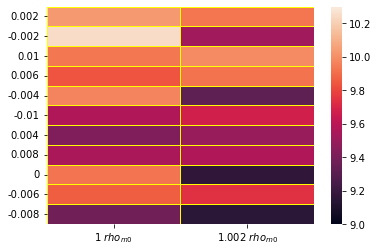

In [27]:
import pandas as pd
import seaborn as sns

sns.heatmap(EP, vmin=9, vmax=10.3, annot=False, linecolor="yellow", linewidths=1, xticklabels={"1.002 $rho_{m0}$", "1 $rho_{m0}$"}, yticklabels={"0.01", "0.008", "0.006", "0.004", "0.002", "0", "-0.002", "-0.004", "-0.006", "-0.008", "-0.01"})